In [279]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('/content/credit card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29998 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [86]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [87]:
df = df.dropna()

In [88]:
x = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month']

In [89]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,50000.0,1,1,2,37.0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,500000.0,1,1,2,29.0,0,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [90]:
y

0        1
1        1
4        0
5        0
6        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 29998, dtype: int64

In [91]:
a = pd.DataFrame(x)

In [92]:
scl = StandardScaler()

In [93]:
x = scl.fit_transform(x)

In [94]:
x

array([[-1.73222396, -1.13675464,  0.81020547, ..., -0.30806896,
        -0.31414271, -0.29338086],
       [-1.73210849, -0.36602557,  0.81020547, ..., -0.24423805,
        -0.31414271, -0.18088066],
       [-1.73176205, -0.90553592, -1.23425481, ...,  0.26640925,
        -0.26904675, -0.25518704],
       ...,
       [ 1.73176208, -1.05968173, -1.23425481, ..., -0.03997913,
        -0.18324006, -0.11900554],
       [ 1.73187756, -0.6743172 , -1.23425481, ..., -0.18513062,
         3.15242129, -0.19190568],
       [ 1.73199304, -0.90553592, -1.23425481, ..., -0.24423805,
        -0.24869139, -0.23713076]])

In [220]:
a

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,50000.0,1,1,2,37.0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,500000.0,1,1,2,29.0,0,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [96]:
features = a.columns

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 1)

# RandomForestClassifier

In [100]:
rnd = RandomForestClassifier()

In [101]:
rnd.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
ytrn_prd1 = rnd.predict(x_train)

In [103]:
ytst_Prd1 = rnd.predict(x_test)

In [104]:
trn_acc1 = accuracy_score(ytrn_prd1,y_train)
trn_acc1*100

100.0

In [105]:
tst_acc1 = accuracy_score(ytst_Prd1,y_test)
tst_acc1*100

82.22222222222221

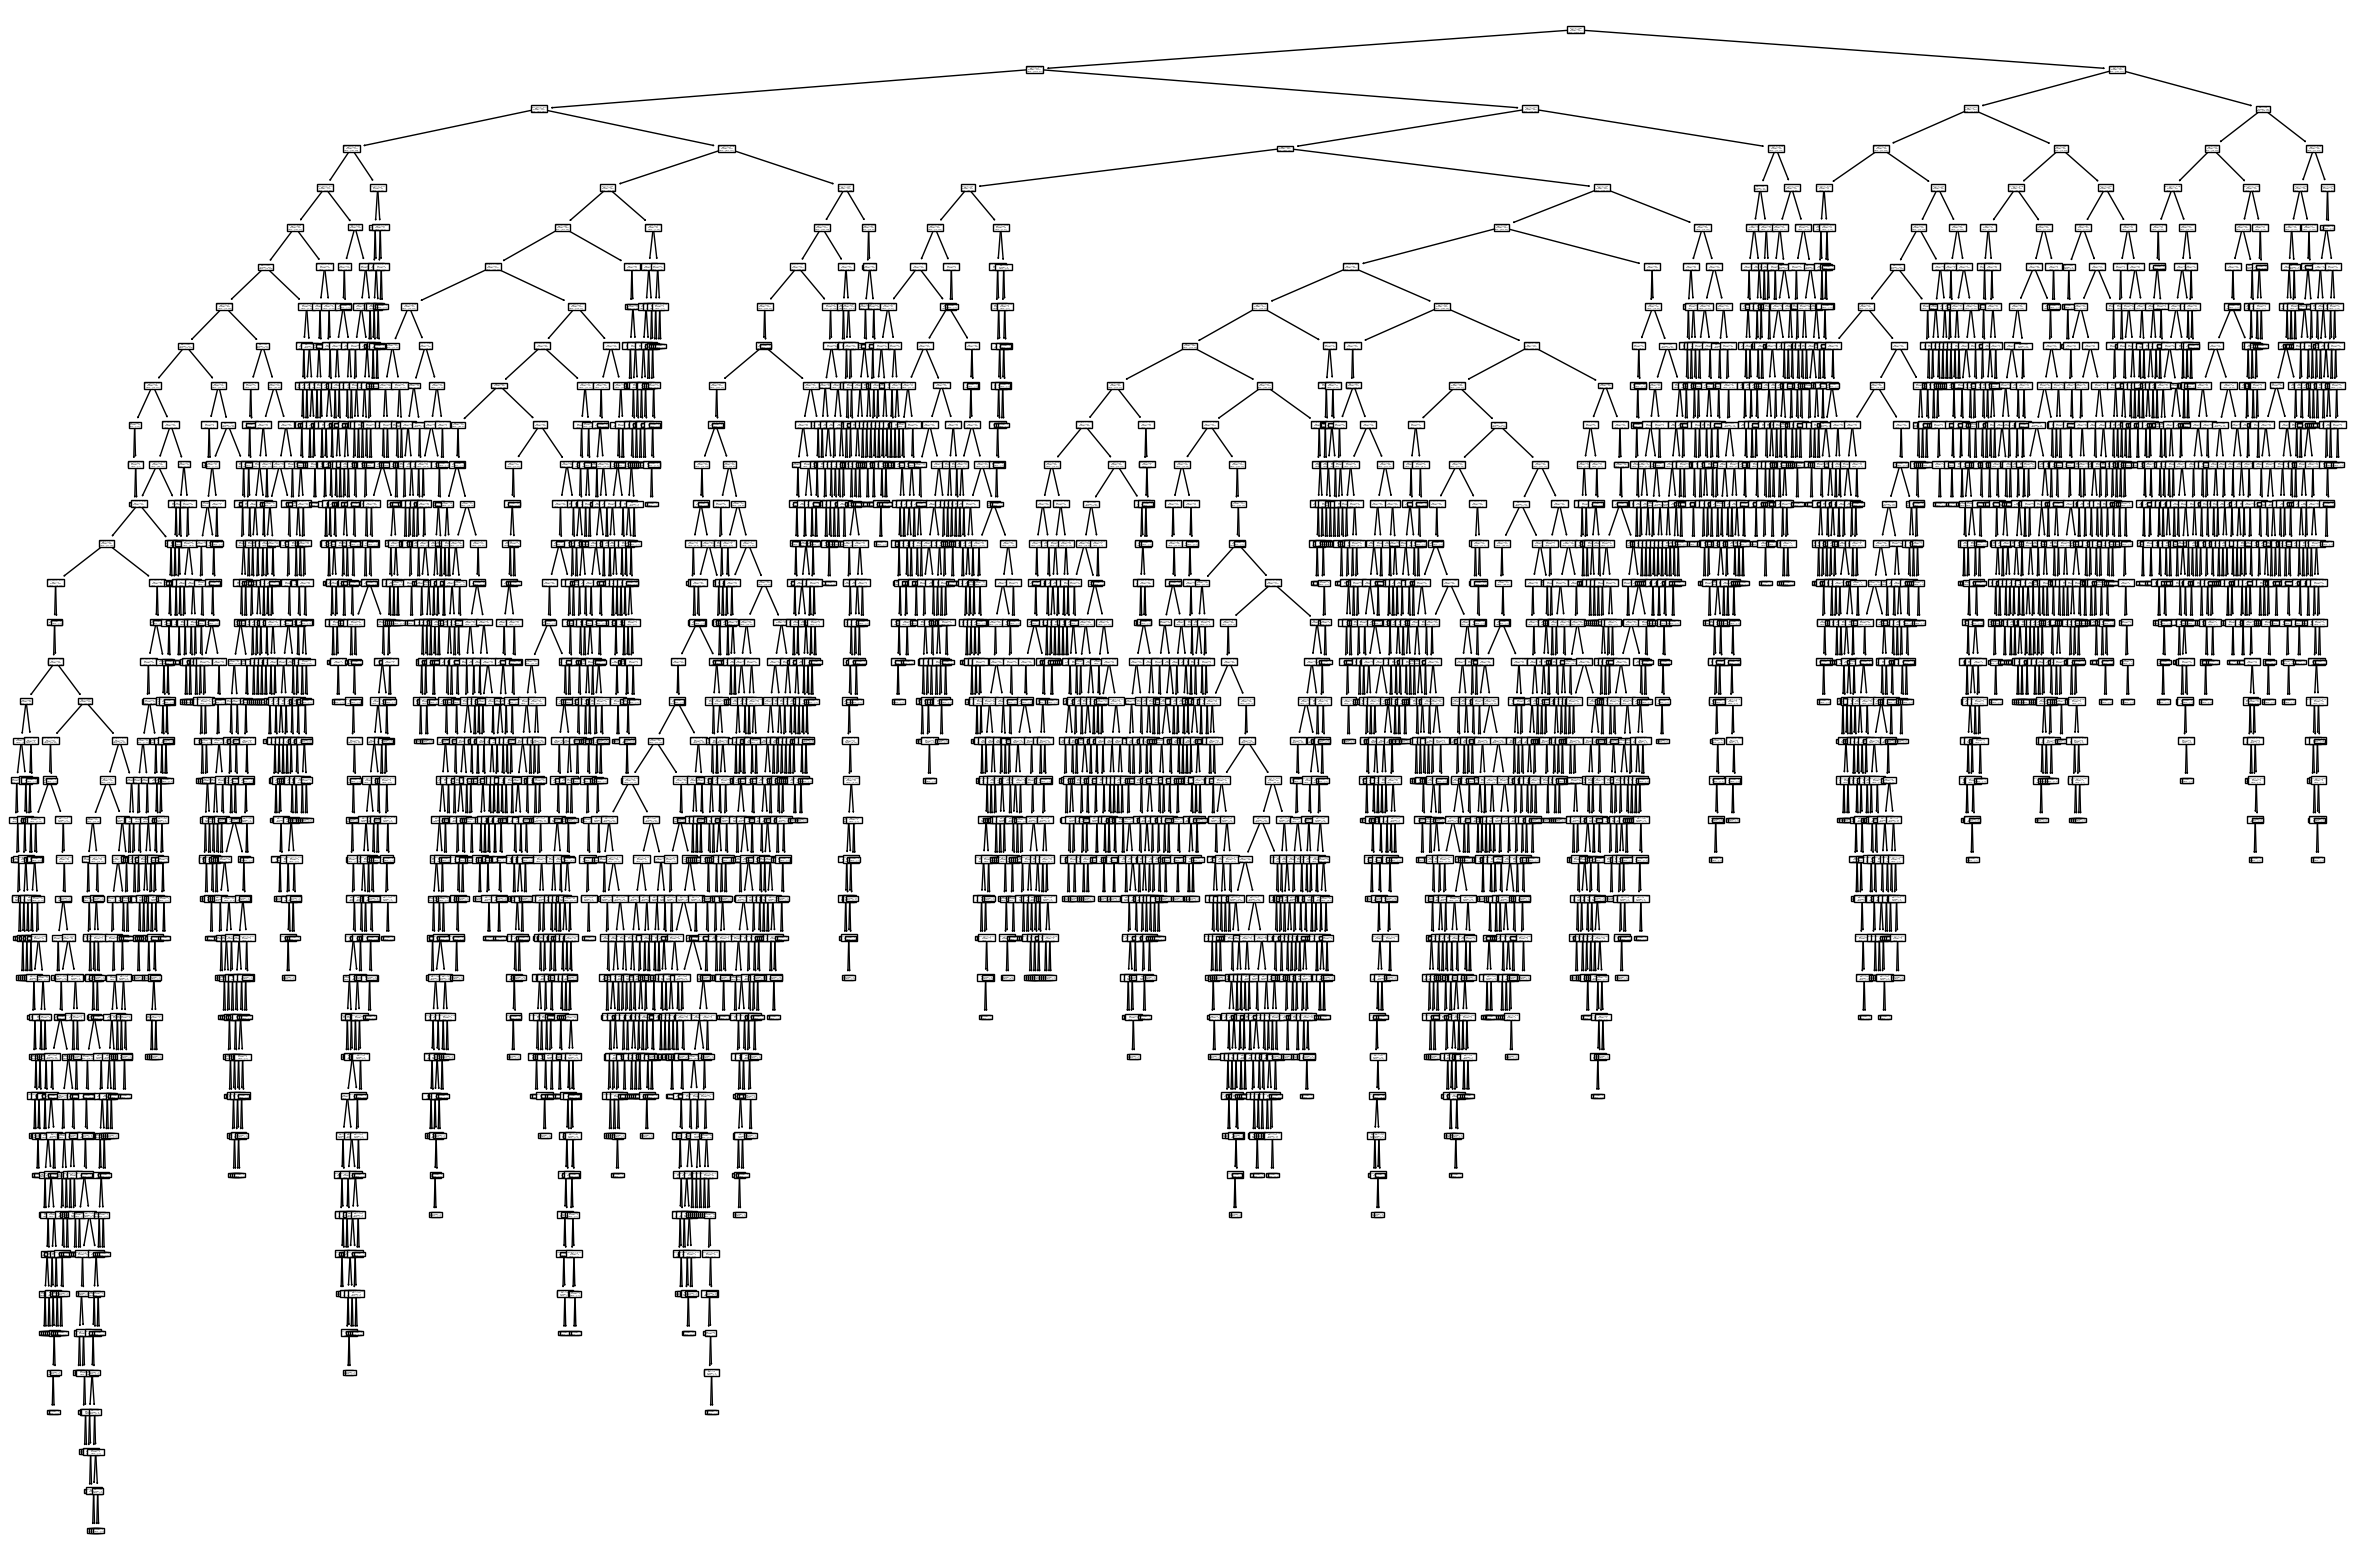

In [107]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train,y_train)
plt.figure(figsize = (30,20))
plot_tree(rf.estimators_[0], feature_names = features)
plt.show()

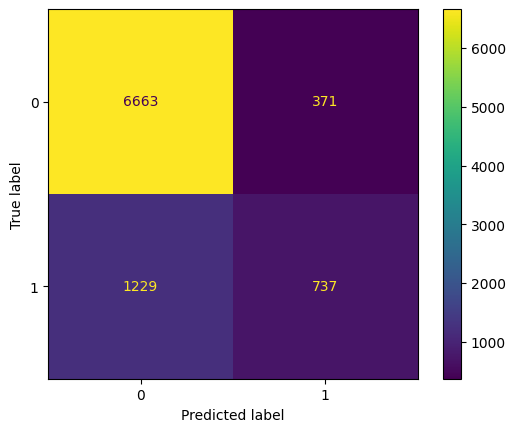

In [108]:
cm = confusion_matrix(y_test,ytst_Prd1)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

In [109]:
print(classification_report(y_test,ytst_Prd1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7034
           1       0.67      0.37      0.48      1966

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



# DecisionTreeClassifier

In [110]:
tr = tree.DecisionTreeClassifier()

In [111]:
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
ytrn_prd2 = tr.predict(x_train)

In [113]:
ytst_prd2 = tr.predict(x_test)

In [118]:
trn_acc2 = accuracy_score(ytrn_prd2,y_train)
trn_acc2*100

100.0

In [119]:
tst_acc2 = accuracy_score(ytst_prd2,y_test)
tst_acc2*100

72.12222222222222

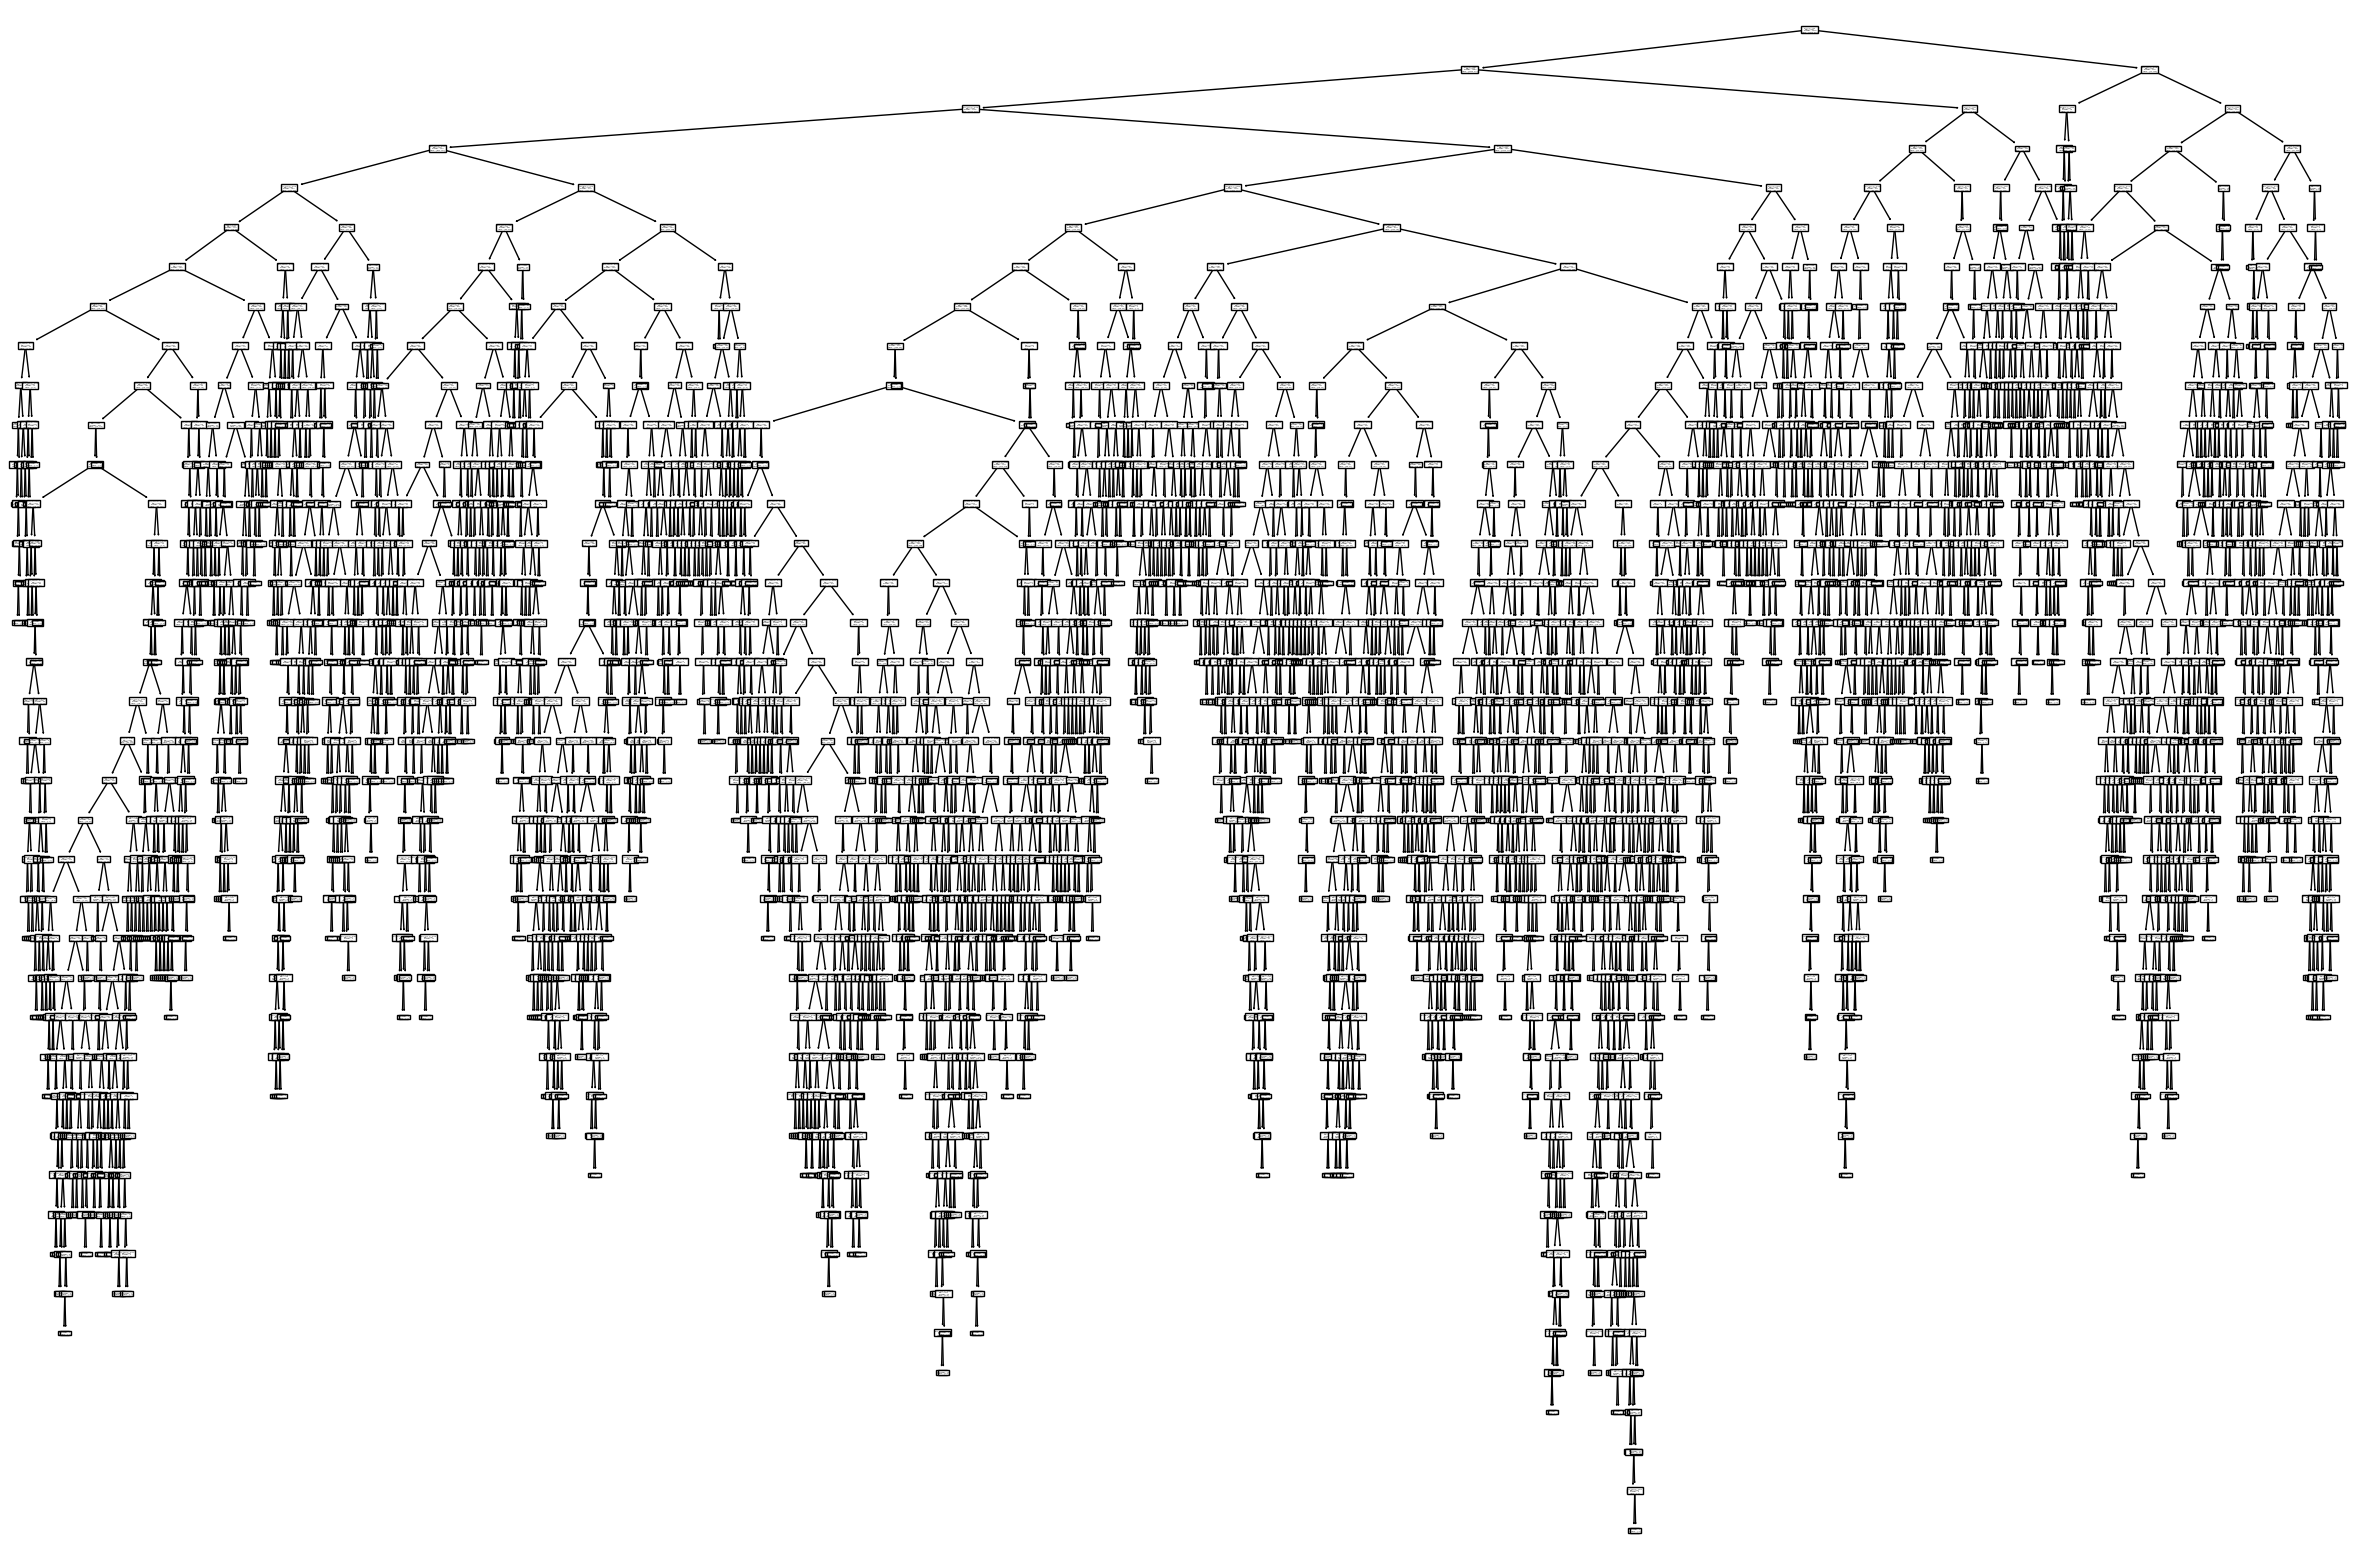

In [120]:
plt.figure(figsize = (30,20))
plot_tree(tr,feature_names = features)
plt.show()

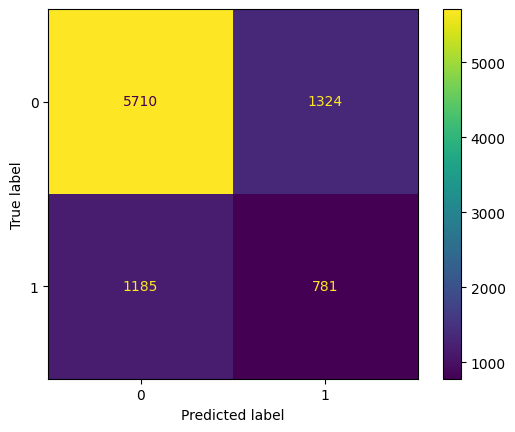

In [122]:
cm1 = confusion_matrix(y_test,ytst_prd2)
cm1_disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_disp.plot()
plt.show()

In [124]:
print(classification_report(y_test,ytst_prd2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7034
           1       0.37      0.40      0.38      1966

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000



# KNN

In [126]:
kn = KNeighborsClassifier()

In [127]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [128]:
ytrn_prd3 = kn.predict(x_train)

In [129]:
ytst_prd3 = kn.predict(x_test)

In [130]:
trn_acc3 = accuracy_score(ytrn_prd3,y_train)
trn_acc3*100

84.17944566149157

In [131]:
tst_acc3 = accuracy_score(ytst_prd3,y_test)
tst_acc3*100

79.24444444444444

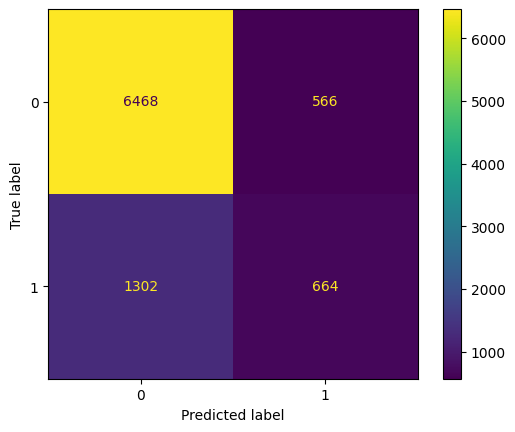

In [134]:
cm2 = confusion_matrix(y_test,ytst_prd3)
cm2_disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
cm2_disp.plot()
plt.show()

In [135]:
print(classification_report(y_test,ytst_prd3))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7034
           1       0.54      0.34      0.42      1966

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.64      9000
weighted avg       0.77      0.79      0.77      9000



# LogisticRegression

In [136]:
lr = LogisticRegression()

In [137]:
lr.fit(x_train,y_train)

LogisticRegression()

In [138]:
ytrn_prd4 = lr.predict(x_train)

In [139]:
ytst_prd4 = lr.predict(x_test)

In [140]:
trn_acc4 = accuracy_score(ytrn_prd4,y_train)
trn_acc4*100

80.84103247928374

In [141]:
tst_acc4 = accuracy_score(ytst_prd4,y_test)
tst_acc4*100

81.46666666666667

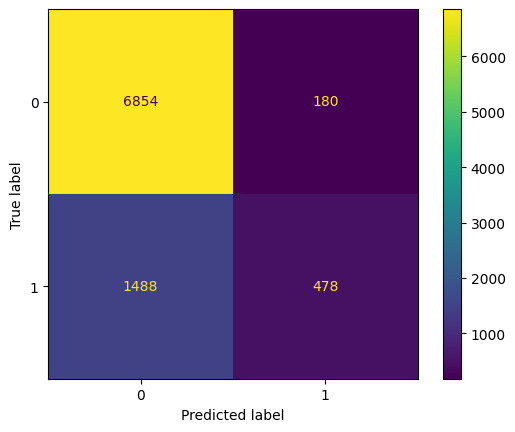

In [142]:
cm4 = confusion_matrix(y_test,ytst_prd4)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix = cm4)
cm_disp4.plot()
plt.show()

In [143]:
print(classification_report(y_test,ytst_prd4))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7034
           1       0.73      0.24      0.36      1966

    accuracy                           0.81      9000
   macro avg       0.77      0.61      0.63      9000
weighted avg       0.80      0.81      0.78      9000



# Bagging Classifier

In [148]:
bc = BaggingClassifier()

In [149]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [150]:
ytrn_prd5 = bc.predict(x_train)

In [151]:
ytst_prd5 = bc.predict(x_test)

In [152]:
trn_acc5 = accuracy_score(ytrn_prd5,y_train)
trn_acc5*100

98.06648252214497

In [153]:
tst_acc5 = accuracy_score(ytst_prd5,y_test)
tst_acc5*100

80.78888888888889

In [155]:
bc1 = BaggingClassifier(n_estimators = 12)

[Text(0.7406295434893316, 0.9864864864864865, 'PAY_0 <= 1.35\ngini = 0.348\nsamples = 13305\nvalue = [16279, 4719]'),
 Text(0.5700400768750323, 0.9594594594594594, 'PAY_2 <= 1.365\ngini = 0.282\nsamples = 11926\nvalue = [15625, 3192]'),
 Text(0.3071264598731051, 0.9324324324324325, 'PAY_AMT2 <= -0.218\ngini = 0.251\nsamples = 10914\nvalue = [14677, 2527]'),
 Text(0.1701861550171062, 0.9054054054054054, 'PAY_AMT4 <= -0.225\ngini = 0.366\nsamples = 2583\nvalue = [3122, 990]'),
 Text(0.09452161633252414, 0.8783783783783784, 'LIMIT_BAL <= -1.175\ngini = 0.391\nsamples = 1984\nvalue = [2322, 843]'),
 Text(0.008938559822023734, 0.8513513513513513, 'PAY_AMT5 <= -0.288\ngini = 0.465\nsamples = 26\nvalue = [18, 31]'),
 Text(0.007807990990779626, 0.8243243243243243, 'ID <= -0.959\ngini = 0.339\nsamples = 18\nvalue = [8, 29]'),
 Text(0.0072427065751575715, 0.7972972972972973, 'PAY_AMT2 <= -0.248\ngini = 0.49\nsamples = 8\nvalue = [8, 6]'),
 Text(0.006677422159535517, 0.7702702702702703, 'PAY_4 <=

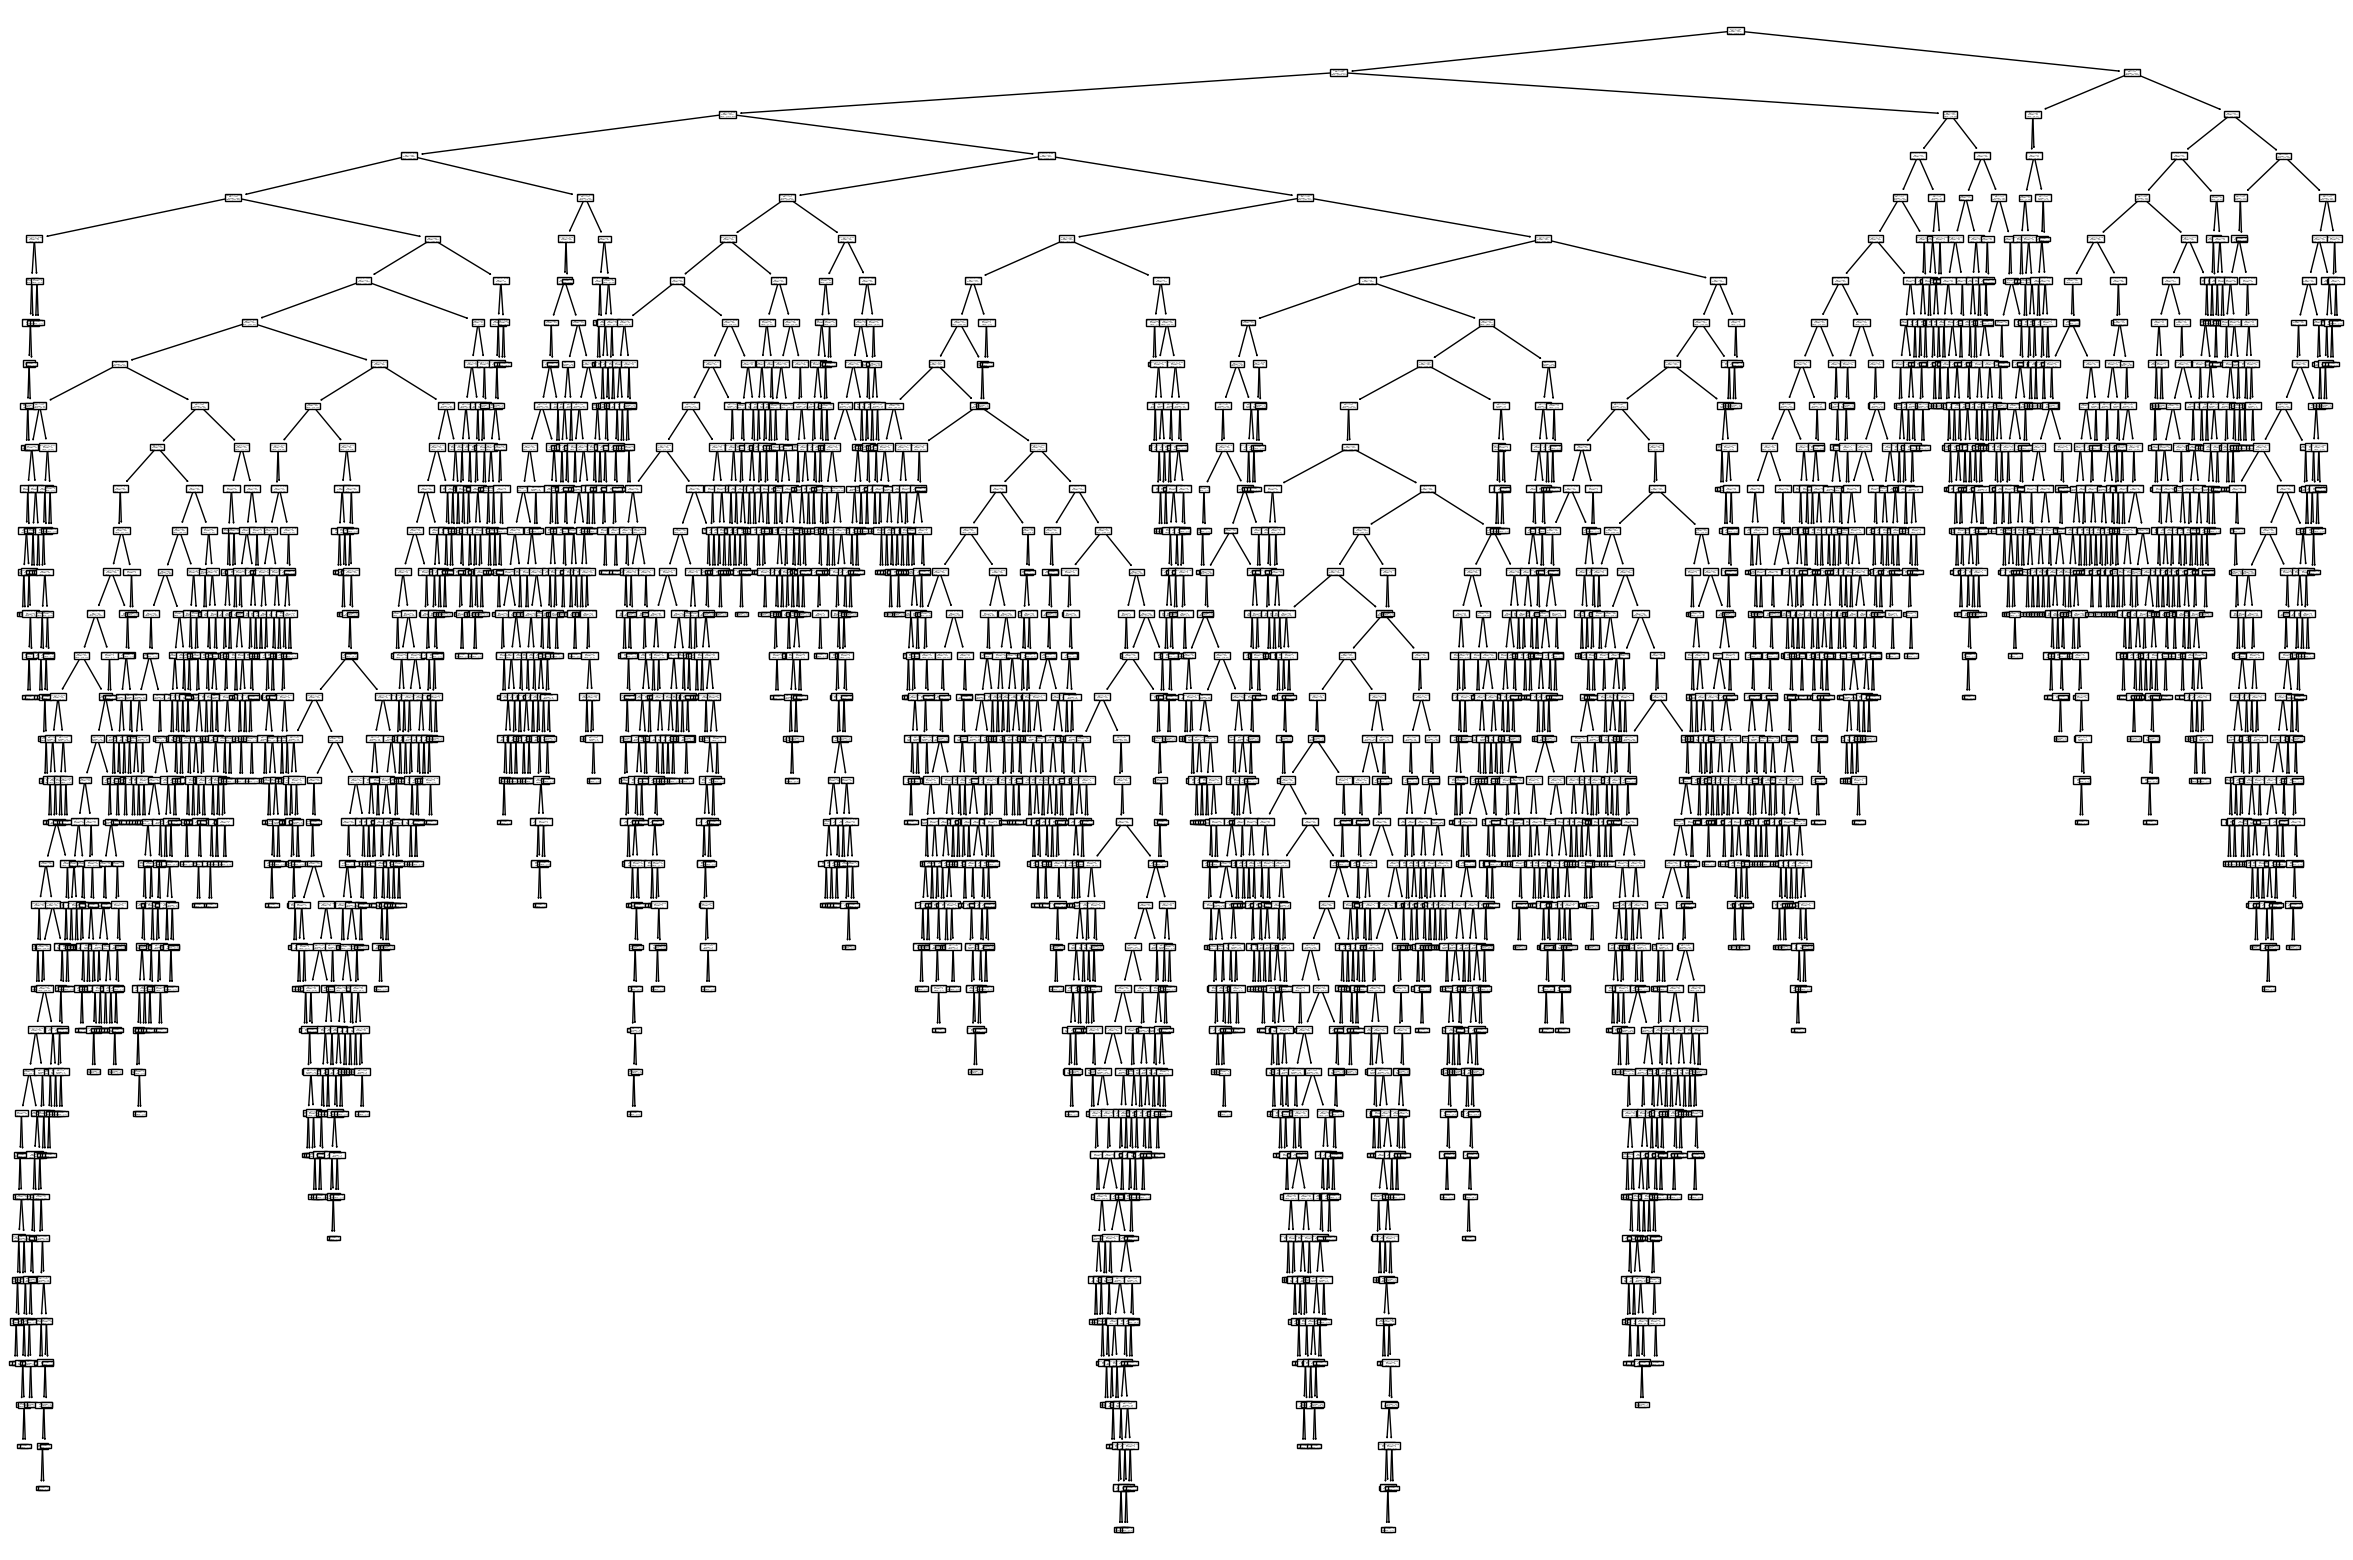

In [156]:
plt.figure(figsize = (30,20))
plot_tree(bc.estimators_[0],feature_names = features)
plt.show()

# AdaBoostClassifier

In [158]:
ab = AdaBoostClassifier()

In [159]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [160]:
ytrn_prd6 = ab.predict(x_train)

In [162]:
ytst_prd6 = ab.predict(x_test)

In [165]:
trn_acc6 = accuracy_score(ytrn_prd6,y_train)
trn_acc6*100

81.6696828269359

In [168]:
tst_acc6 = accuracy_score(ytst_prd6,y_test)
tst_acc6*100

81.75555555555556

In [173]:
ab1 = AdaBoostClassifier(n_estimators=10)


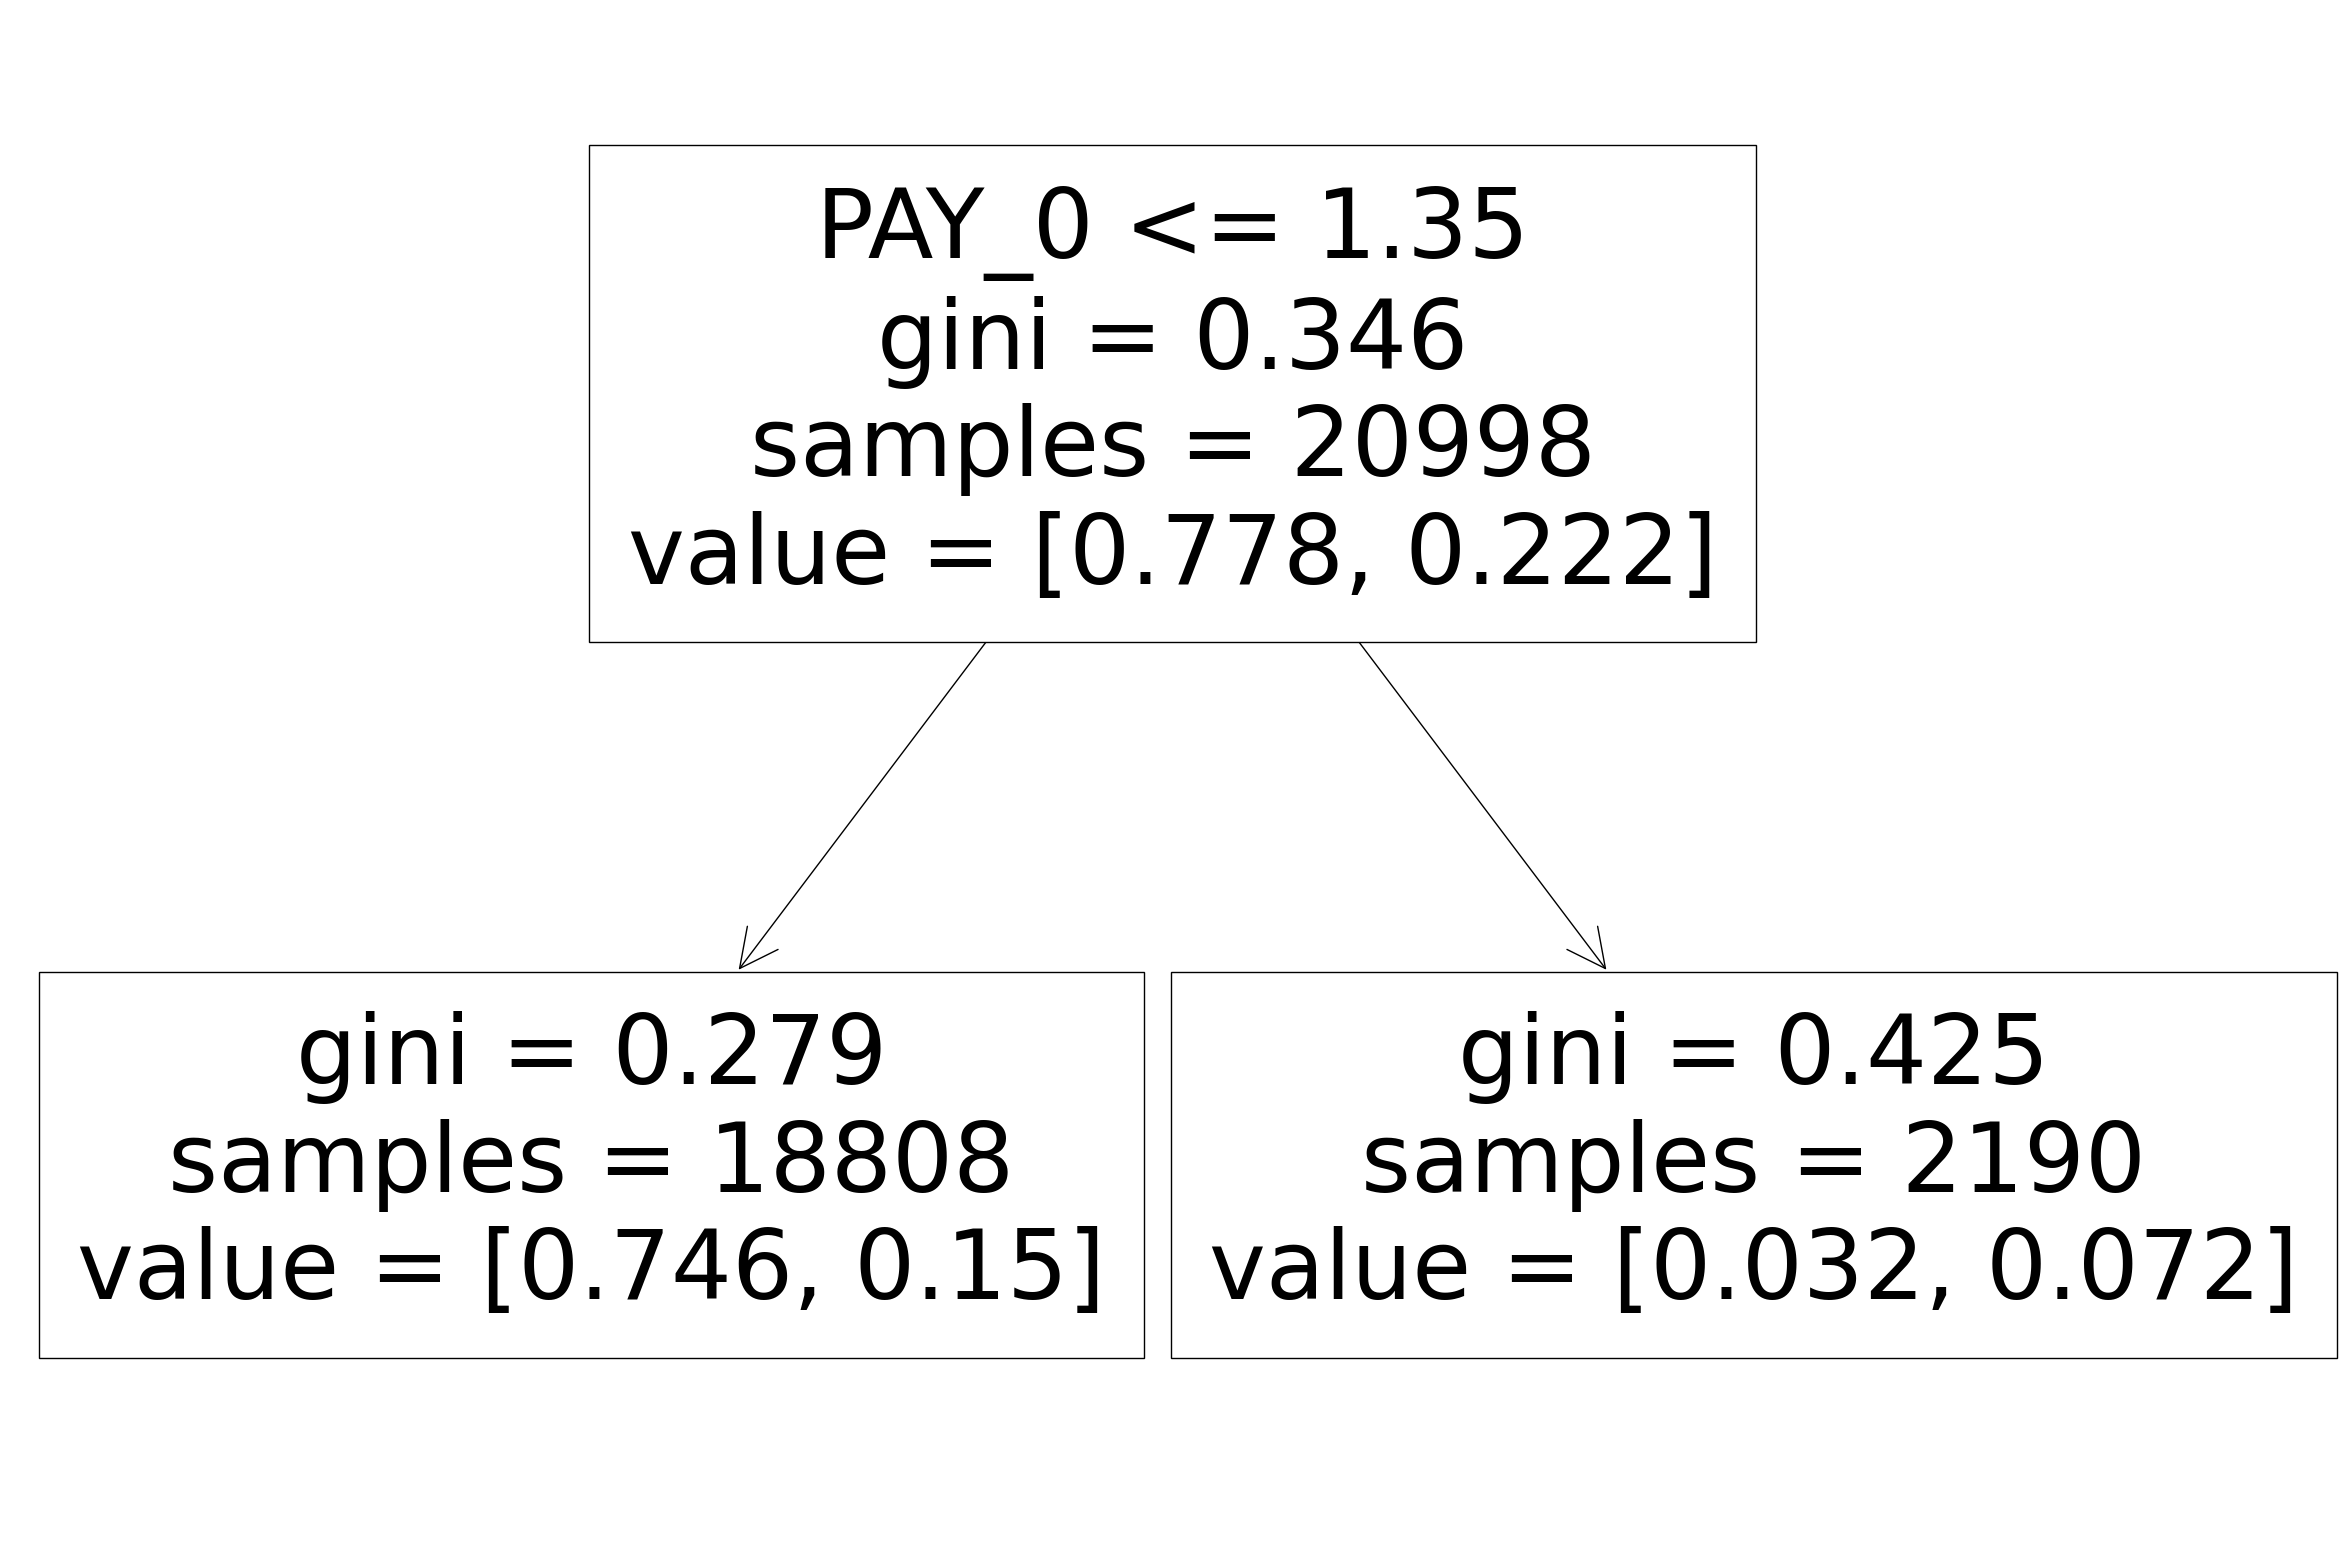

In [174]:
plt.figure(figsize = (30,20))
plot_tree(ab.estimators_[0], feature_names = features)
plt.show()

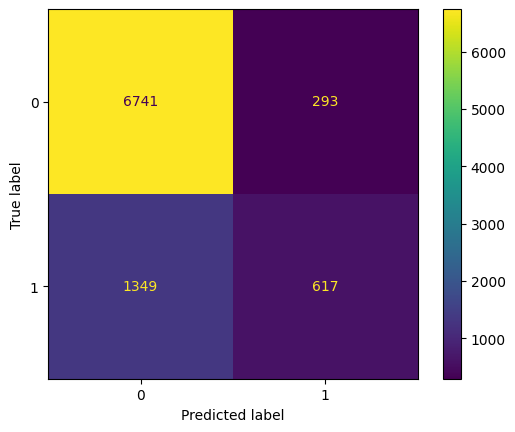

In [175]:
cm6 = confusion_matrix(y_test,ytst_prd6)
cm6_disp = ConfusionMatrixDisplay(confusion_matrix = cm6)
cm6_disp.plot()
plt.show()

In [176]:
print(classification_report(y_test,ytst_prd6))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7034
           1       0.68      0.31      0.43      1966

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



# XGboost

In [177]:
xg = XGBClassifier()

In [178]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [185]:
ytrn_prd7 = xg.predict(x_train)

In [186]:
ytst_prd7 = xg.predict(x_test)

In [187]:
trn_acc7 = accuracy_score(ytrn_prd7,y_train)
trn_acc7*100

89.24183255548147

In [188]:
tst_acc7 = accuracy_score(ytst_prd7,y_test)
tst_acc7*100

81.77777777777779

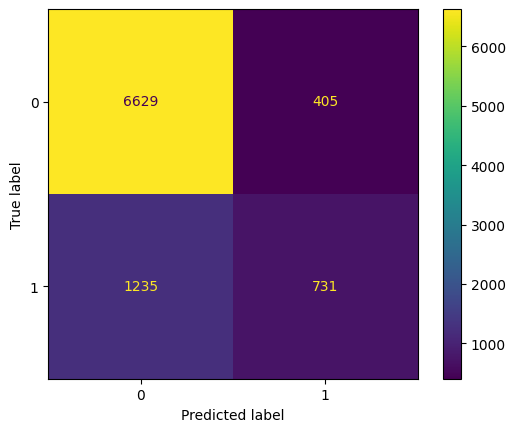

In [189]:
cm7 = confusion_matrix(y_test,ytst_prd7)
cm_disp7 = ConfusionMatrixDisplay(confusion_matrix = cm7)
cm_disp7.plot()
plt.show()

In [190]:
print(classification_report(y_test,ytst_prd7))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7034
           1       0.64      0.37      0.47      1966

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Nave_Bayes(BernoullinNb),(GaussianNB)

In [194]:
bn = BernoulliNB()
bg = GaussianNB()

In [209]:
bn.fit(x_train,y_train)

BernoulliNB()

In [211]:
bg.fit(x_train,y_train)

GaussianNB()

In [212]:
ytrn_prd8 = bn.predict(x_train)

In [213]:
ytrn_prd9 = bg.predict(x_train)

In [214]:
ytst_prd8 = bn.predict(x_test)

In [215]:
ytst_prd9 = bg.predict(x_test)

In [216]:
trn_acc8 = accuracy_score(ytrn_prd8,y_train)
trn_acc8*100

67.42070673397467

In [217]:
trn_acc9 = accuracy_score(ytrn_prd9,y_train)
trn_acc9*100

74.4404228974188

In [221]:
tst_acc8 = accuracy_score(ytst_prd8,y_test)
tst_acc8*100

67.9888888888889

In [222]:
tst_acc9 = accuracy_score(ytst_prd9,y_test)
tst_acc9*100

74.56666666666666

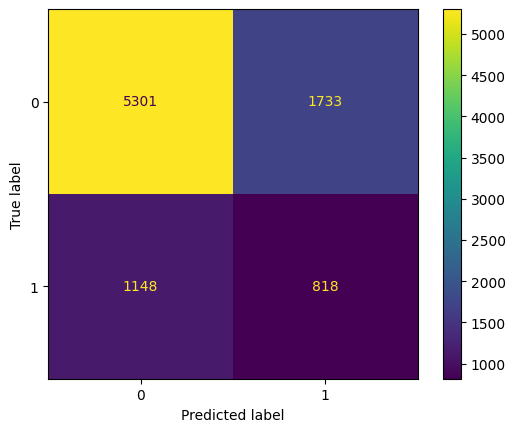

In [223]:
cm8 = confusion_matrix(y_test,ytst_prd8)
cm_disp8 = ConfusionMatrixDisplay(confusion_matrix = cm8)
cm_disp8.plot()
plt.show()

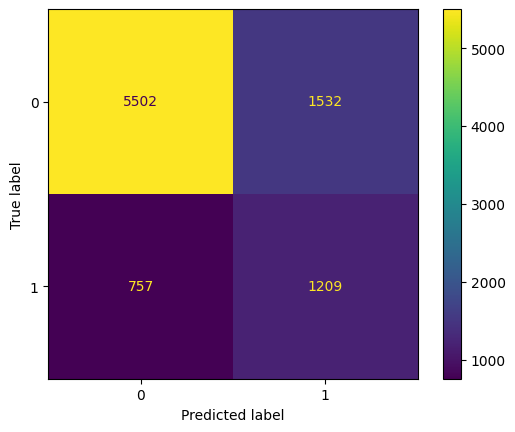

In [224]:
cm9 = confusion_matrix(y_test,ytst_prd9)
cm_disp9 = ConfusionMatrixDisplay(confusion_matrix = cm9)
cm_disp9.plot()
plt.show()

In [225]:
print(classification_report(y_test,ytst_prd8))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      7034
           1       0.32      0.42      0.36      1966

    accuracy                           0.68      9000
   macro avg       0.57      0.58      0.57      9000
weighted avg       0.71      0.68      0.69      9000



In [226]:
print(classification_report(y_test,ytst_prd9))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7034
           1       0.44      0.61      0.51      1966

    accuracy                           0.75      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.75      0.76      9000



# SVM

In [227]:
sv = SVC()

In [228]:
sv.fit(x_train,y_train)

SVC()

In [229]:
ytrn_prd10 = sv.predict(x_train)

In [230]:
ytst_prd10 = sv.predict(x_test)

In [231]:
trn_acc10 = accuracy_score(ytrn_prd10,y_train)
trn_acc10*100

82.58881798266502

In [232]:
tst_acc10 = accuracy_score(ytst_prd10,y_test)
tst_acc10*100

82.24444444444444

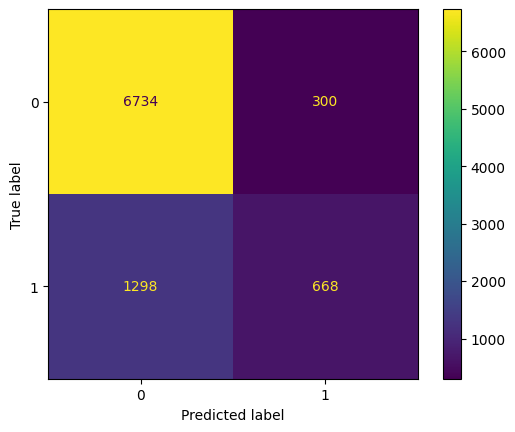

In [233]:
cm10 = confusion_matrix(y_test,ytst_prd10)
cm_disp10 = ConfusionMatrixDisplay(confusion_matrix = cm10)
cm_disp10.plot()
plt.show()

In [234]:
print(classification_report(y_test,ytst_prd10))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7034
           1       0.69      0.34      0.46      1966

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000



# Stochastic gradient descent

In [267]:
sg = SGDClassifier(max_iter=1000)

In [268]:
sg.fit(x_train,y_train)

SGDClassifier()

In [269]:
ytrn_prd11 = sg.predict(x_train)

In [264]:
ytst_prd11 = sg.predict(x_test)

In [270]:
trn_acc11 = accuracy_score(ytrn_prd11,y_train)
trn_acc11*100

81.29821887798838

In [271]:
tst_acc11 = accuracy_score(ytst_prd11,y_test)
tst_acc11*100

81.17777777777778

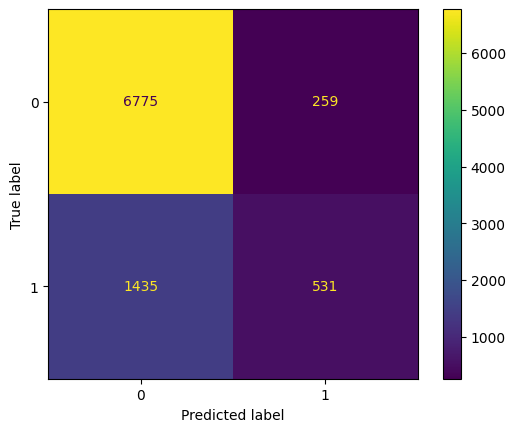

In [273]:
cm11 = confusion_matrix(y_test,ytst_prd11)
cm_disp11 = ConfusionMatrixDisplay(confusion_matrix = cm11)
cm_disp11.plot()
plt.show()

In [276]:
print(classification_report(y_test,ytst_prd11))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7034
           1       0.67      0.27      0.39      1966

    accuracy                           0.81      9000
   macro avg       0.75      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000



# Grid Search for BaggingClassifier

In [280]:
bgc = BaggingClassifier()

In [281]:
bgc.fit(x_train,y_train)

BaggingClassifier()

In [282]:
ytrn_prd12 = bgc.predict(x_train)

In [283]:
ytst_prd12 = bgc.predict(x_test)

In [285]:
trn_acc12 = accuracy_score(ytrn_prd12,y_train)
trn_acc12*100

97.94742356414898

In [286]:
tst_acc12 = accuracy_score(ytst_prd12,y_test)
tst_acc12*100

80.86666666666666

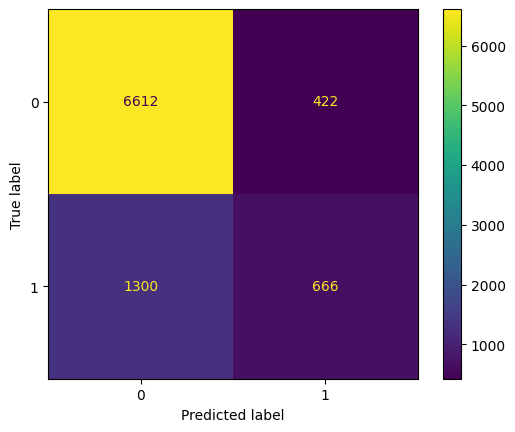

In [287]:
cm12 = confusion_matrix(y_test,ytst_prd12)
cm_disp12 = ConfusionMatrixDisplay(confusion_matrix = cm12)
cm_disp12.plot()
plt.show()

In [288]:
print(classification_report(y_test,ytst_prd12))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7034
           1       0.61      0.34      0.44      1966

    accuracy                           0.81      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000

